In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn import feature_selection


# Regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

In [2]:
# Importación de los datos, se exluyen desde el comienzo los NA-Value cono np.nan
data = pd.read_csv("Laboratorio 3.csv", na_values=["NA-VALUE"])
data.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,6.429631,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7.0,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28.0,0.001397,6.0,0.0,0.000000
1,6.034862,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4.0,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22.0,0.001194,5.0,0.0,0.000208
2,5.000659,30.0,10.0,200.0,69.9612,0.001101,0.000336,4.0,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22.0,0.000745,6.0,0.0,0.000189
3,3.264122,19.0,20.0,400.0,107.6016,0.001034,0.000213,1.0,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19.0,0.000426,7.0,0.0,0.000384
4,3.883553,32.0,10.0,500.0,122.8908,0.001136,0.000327,2.0,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15.0,0.001174,4.0,0.0,0.000019


In [3]:
data.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3238.000000,3237.000000,3237.000000,3237.000000,3237.000000,3236.000000,3237.000000,3237.000000,3237.000000,3236.000000,3238.000000,3236.000000,3237.000000,3238.000000,3236.000000,3238.000000,3236.000000,3237.000000,3235.000000
mean,5.866763,21.664813,15.977757,974.513438,115.330177,0.004073,0.000367,4.342601,0.000095,0.000385,0.003443,40.634541,64.052152,5.277123,22.218789,0.001037,6.563968,0.000061,0.000144
std,3.111672,4.234815,12.071767,17586.005507,48.394129,0.004759,0.000211,2.343168,0.000161,0.000363,0.000971,17.144370,19.125397,1.507255,7.465264,0.000525,1.862155,0.000113,0.000269
min,0.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,4.123874,19.000000,8.000000,300.000000,80.002200,0.001257,0.000204,3.000000,0.000000,0.000141,0.002751,29.214175,50.620700,4.264100,17.000000,0.000685,5.000000,0.000000,0.000000
50%,5.680387,21.000000,12.000000,500.000000,108.002400,0.002482,0.000352,4.000000,0.000040,0.000282,0.003386,36.984250,61.124100,5.093550,22.000000,0.000910,6.000000,0.000000,0.000021
75%,7.082546,24.000000,20.000000,800.000000,141.628200,0.004987,0.000495,6.000000,0.000117,0.000512,0.004017,48.446600,73.812500,6.035900,27.000000,0.001268,8.000000,0.000090,0.000187
max,20.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


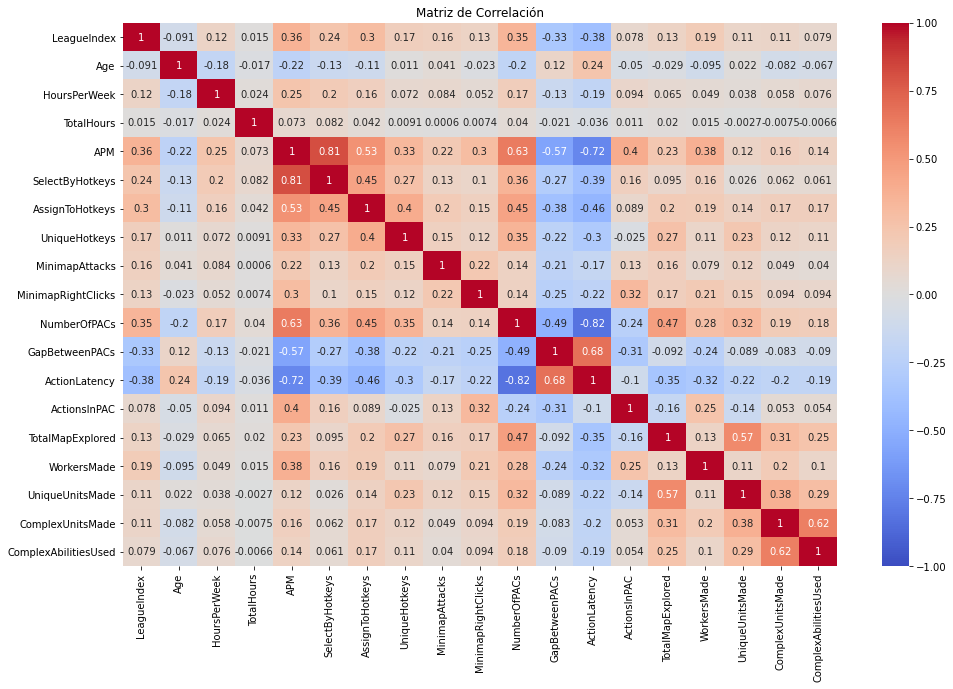

In [4]:
plt.figure(figsize=(16, 10))
corr = data.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap ="coolwarm",annot=True).set_title('Matriz de Correlación');

In [ ]:
data = data.drop(columns = [ "ActionsInPAC", "ActionLatency", "GapBetweenPACs", "NumberOfPACs", "AssignToHotkeys", "SelectByHotkeys", "ComplexAbilitiesUsed", "UniqueUnitsMade"])

In [ ]:
data.shape

(3238, 19)

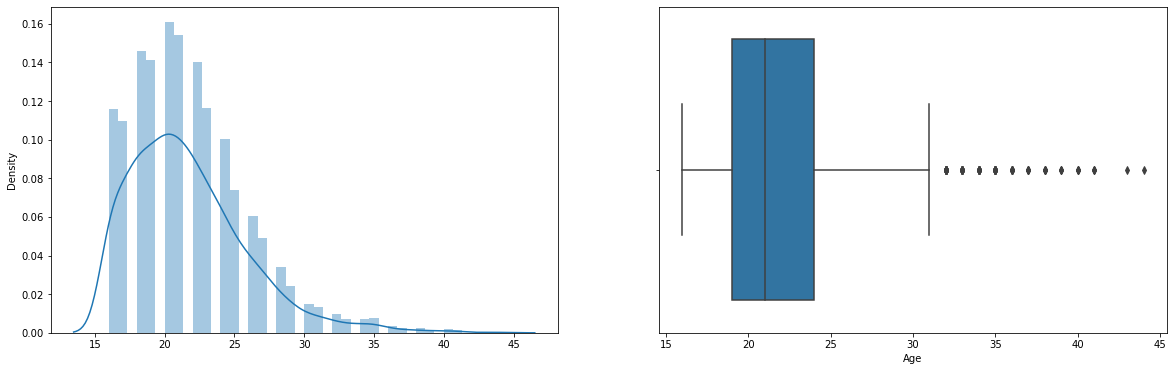

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["Age"])
sns.boxplot(ax=axs[1],x=data["Age"]);
data.shape

Quitamos los outliers de la columna HoursPerWeek. Consideramos que los datos mayores a 80 eran outliers. 

(3234, 19)

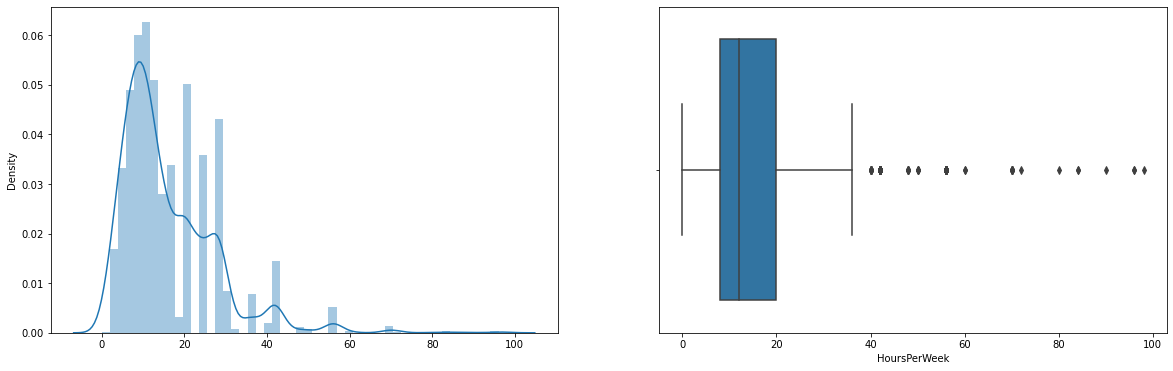

In [6]:
data = data[data["HoursPerWeek"]<100]
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["HoursPerWeek"])
sns.boxplot(ax=axs[1],x=data["HoursPerWeek"]);
data.shape

Quitamos los valores de TotalHours que podemos considerar outliers que son los mayores a 1000

(3234, 19)

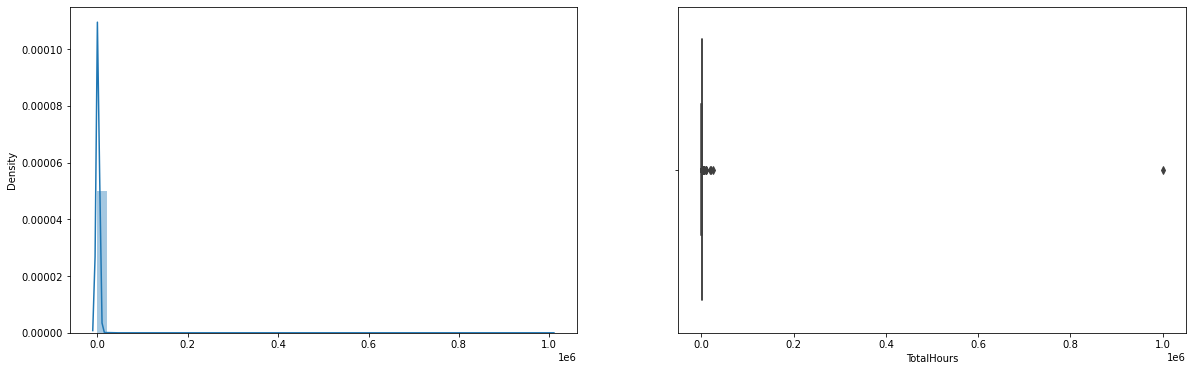

In [7]:
#data = data[data["TotalHours"]<1400]
#data = data[data["TotalHours"]>0]
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["TotalHours"])
sns.boxplot(ax=axs[1],x=data["TotalHours"]);
data.shape

Borramos los valores mayores a 350 de acuerdo con el boxplot

(3234, 19)

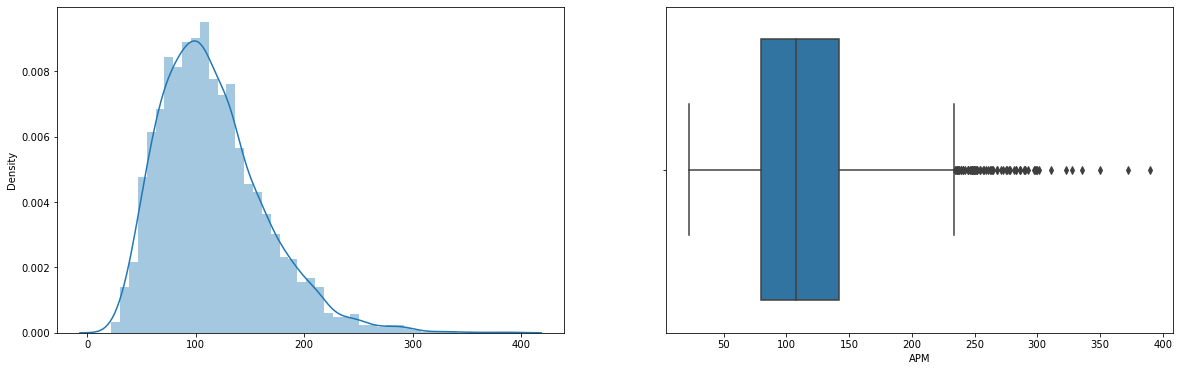

In [8]:
#data = data[data["APM"]<220]
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["APM"])
sns.boxplot(ax=axs[1],x=data["APM"]);
data.shape

Borramos los valores que son menores a 0.02 de acuerdo con el boxplot

Borramos los valores que son outliers que corresponden a los mayores a 0.001

Dejamos esta variable como es ya que no tiene valores extremos radicales

(3234, 19)

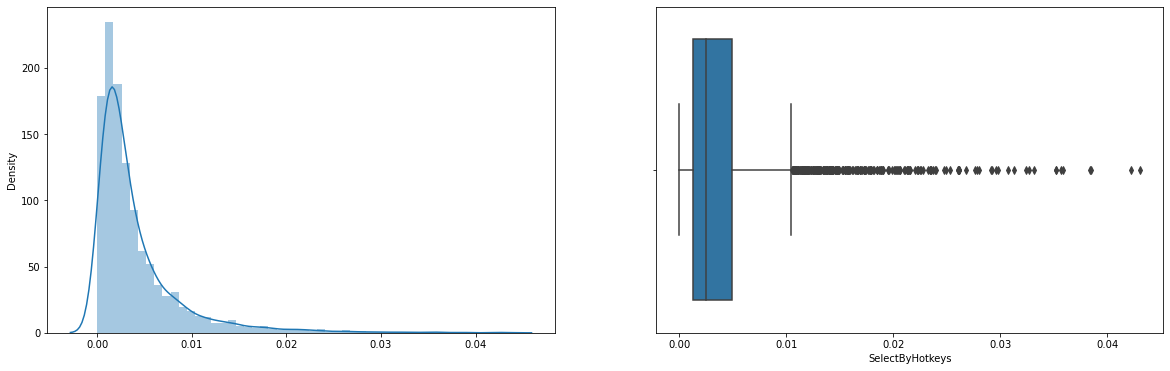

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
#data = data[data["SelectByHotkeys"]<0.01]
sns.distplot(ax=axs[0], x=data["SelectByHotkeys"])
sns.boxplot(ax=axs[1],x=data["SelectByHotkeys"]);
data.shape

(3234, 19)

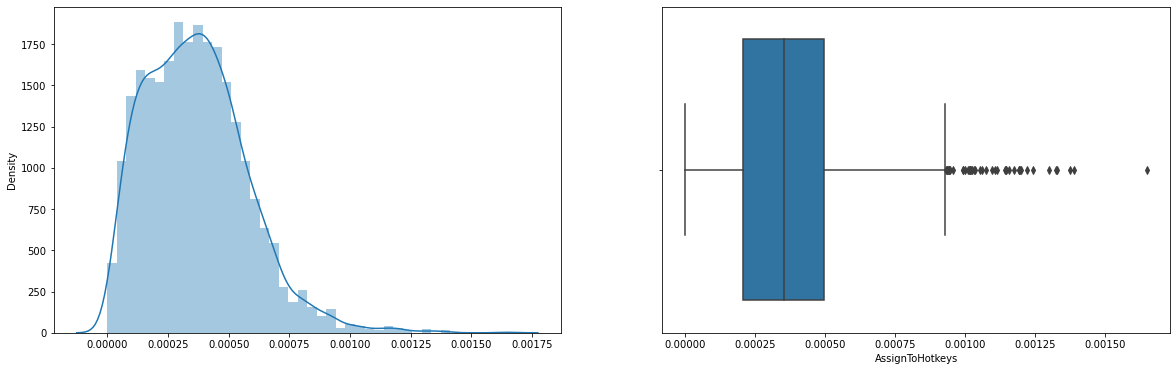

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
#data = data[data["AssignToHotkeys"]<0.0009]
sns.distplot(ax=axs[0], x=data["AssignToHotkeys"])
sns.boxplot(ax=axs[1],x=data["AssignToHotkeys"]);
data.shape

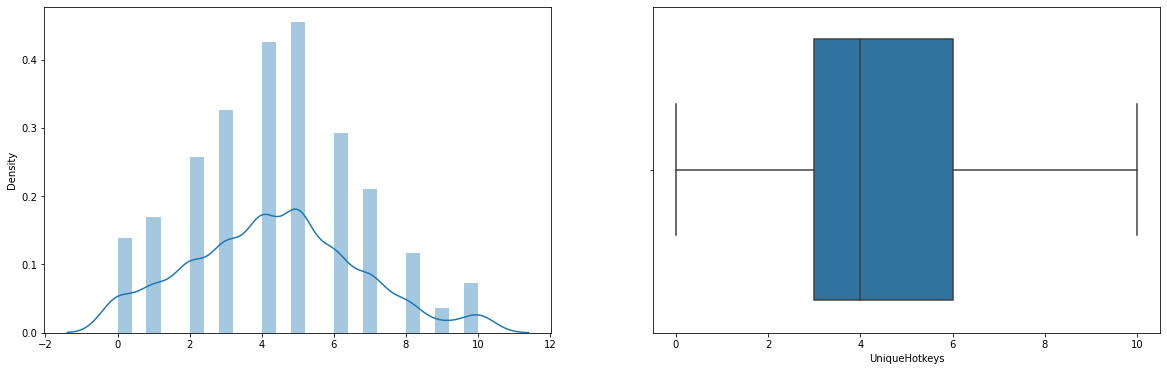

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["UniqueHotkeys"])
sns.boxplot(ax=axs[1],x=data["UniqueHotkeys"]);

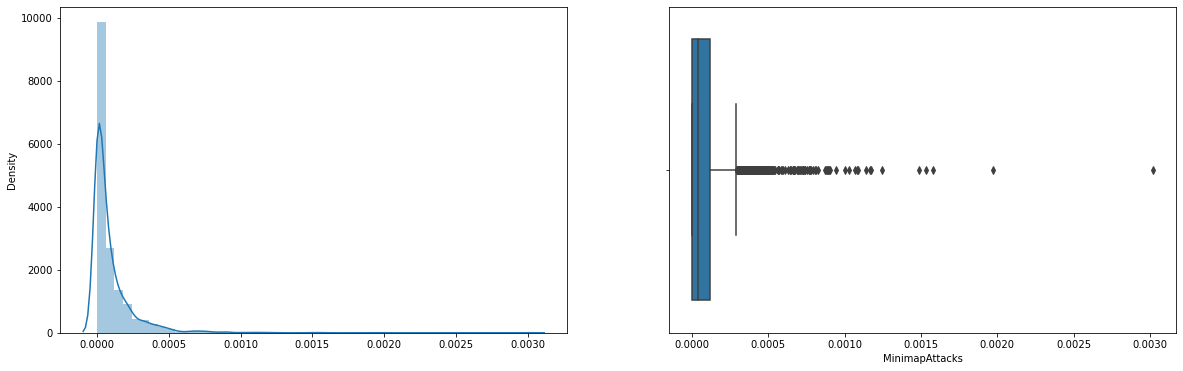

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["MinimapAttacks"])
sns.boxplot(ax=axs[1],x=data["MinimapAttacks"]);

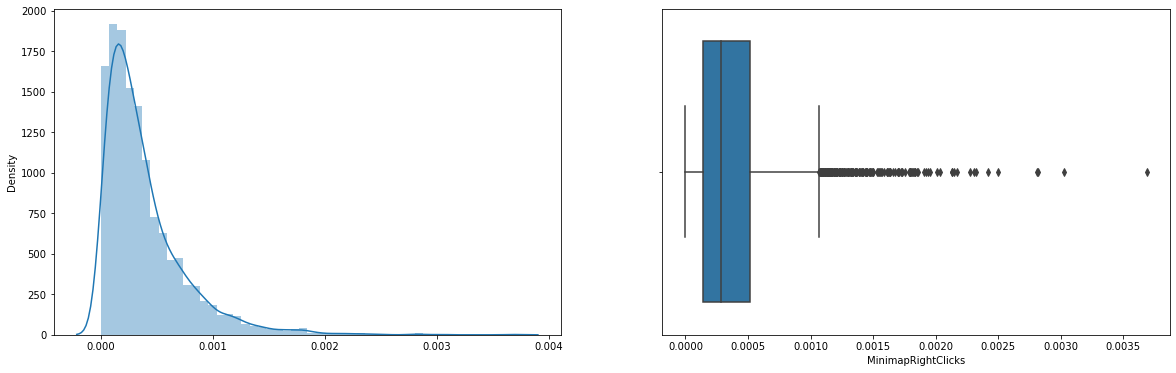

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["MinimapRightClicks"])
sns.boxplot(ax=axs[1],x=data["MinimapRightClicks"]);

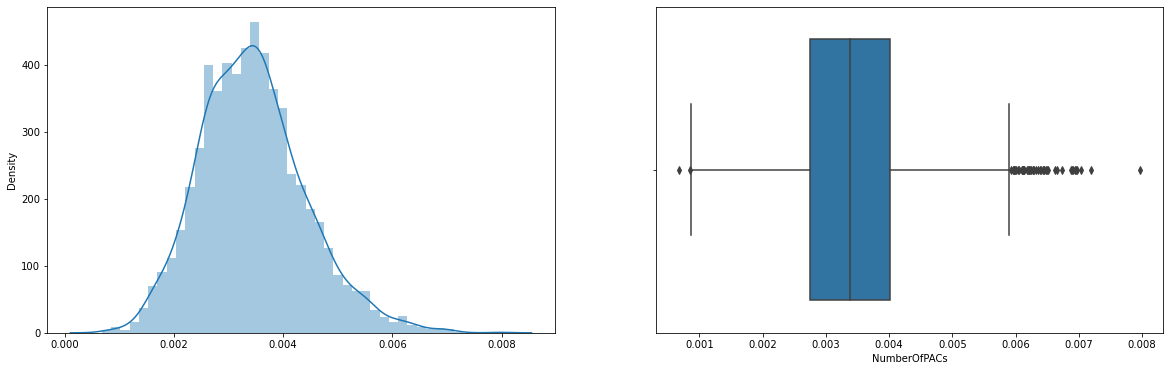

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["NumberOfPACs"])
sns.boxplot(ax=axs[1],x=data["NumberOfPACs"]);

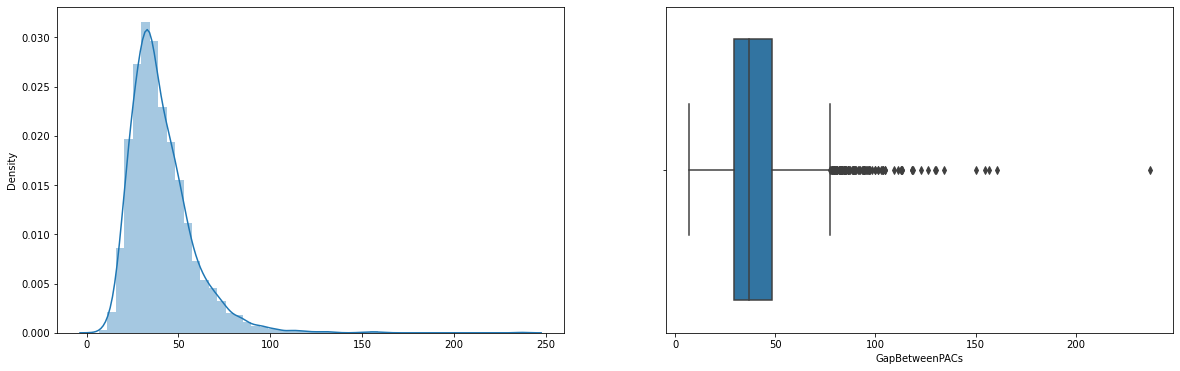

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["GapBetweenPACs"])
sns.boxplot(ax=axs[1],x=data["GapBetweenPACs"]);

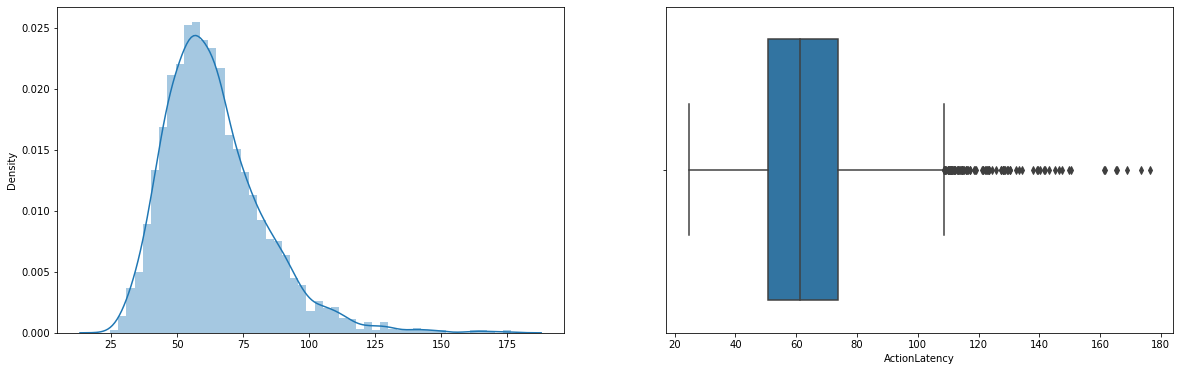

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["ActionLatency"])
sns.boxplot(ax=axs[1],x=data["ActionLatency"]);

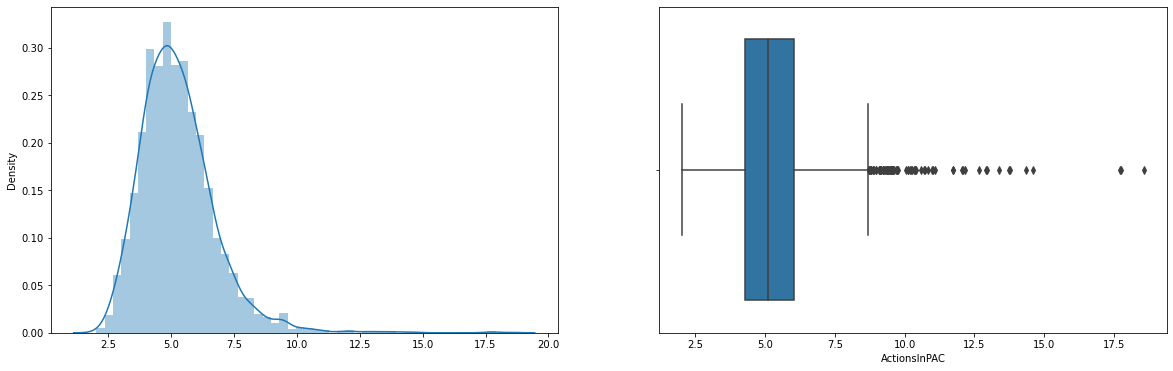

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["ActionsInPAC"])
sns.boxplot(ax=axs[1],x=data["ActionsInPAC"]);

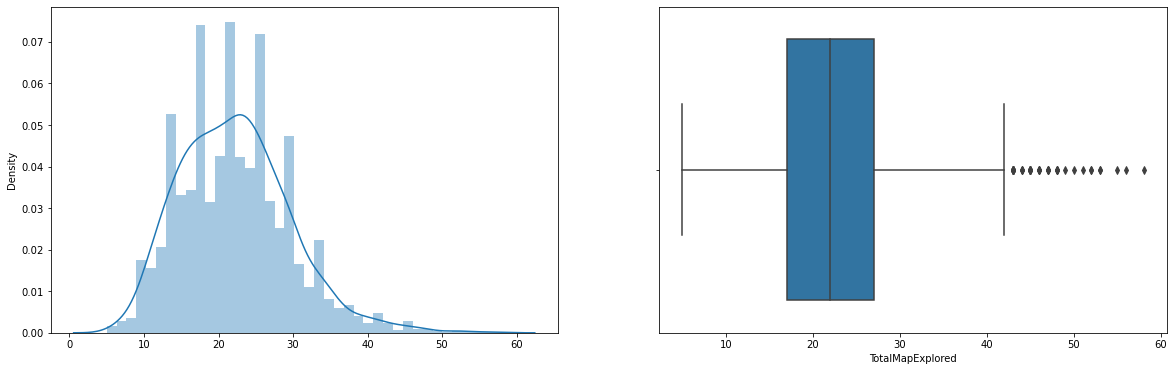

In [18]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["TotalMapExplored"])
sns.boxplot(ax=axs[1],x=data["TotalMapExplored"]);

(3234, 19)

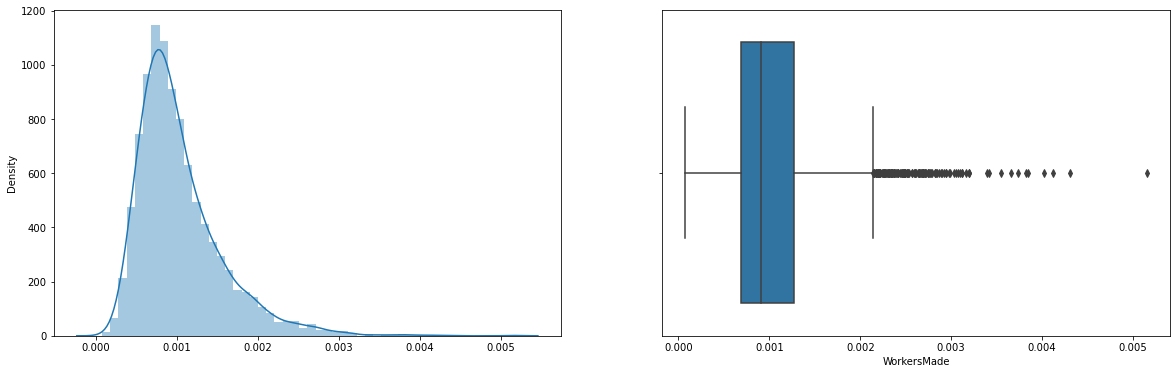

In [19]:
#data = data[data["WorkersMade"]<0.004]
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["WorkersMade"])
sns.boxplot(ax=axs[1],x=data["WorkersMade"]);
data.shape

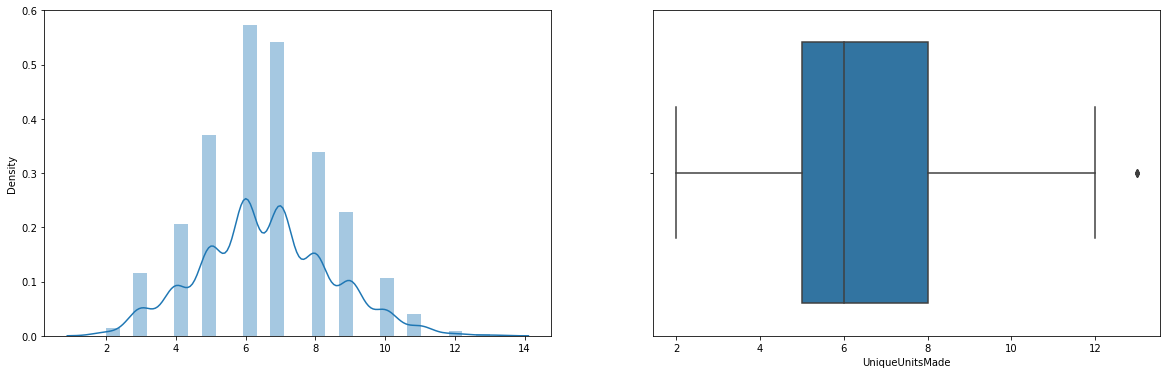

In [20]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["UniqueUnitsMade"])
sns.boxplot(ax=axs[1],x=data["UniqueUnitsMade"]);

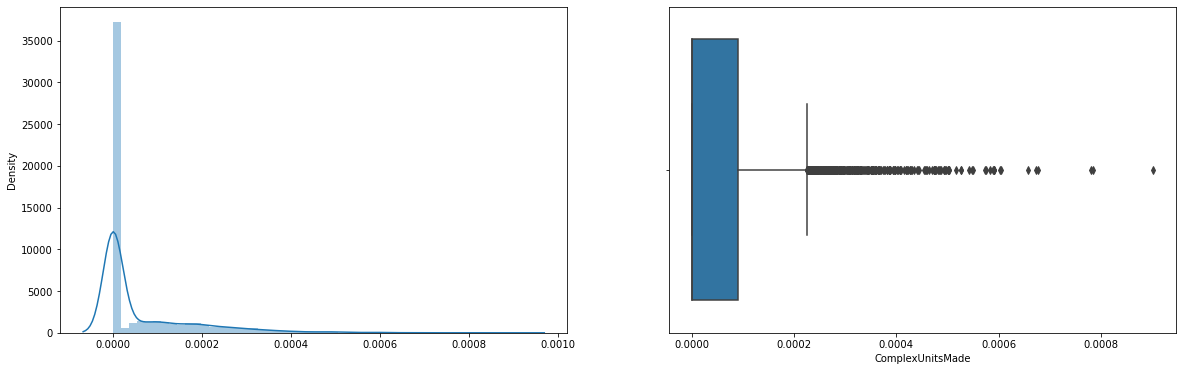

In [21]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["ComplexUnitsMade"])
sns.boxplot(ax=axs[1],x=data["ComplexUnitsMade"]);

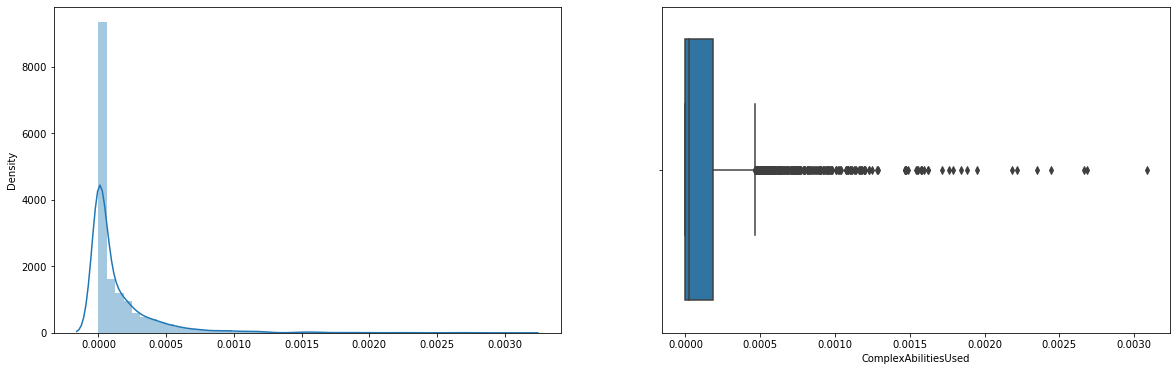

In [22]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(ax=axs[0], x=data["ComplexAbilitiesUsed"])
sns.boxplot(ax=axs[1],x=data["ComplexAbilitiesUsed"]);

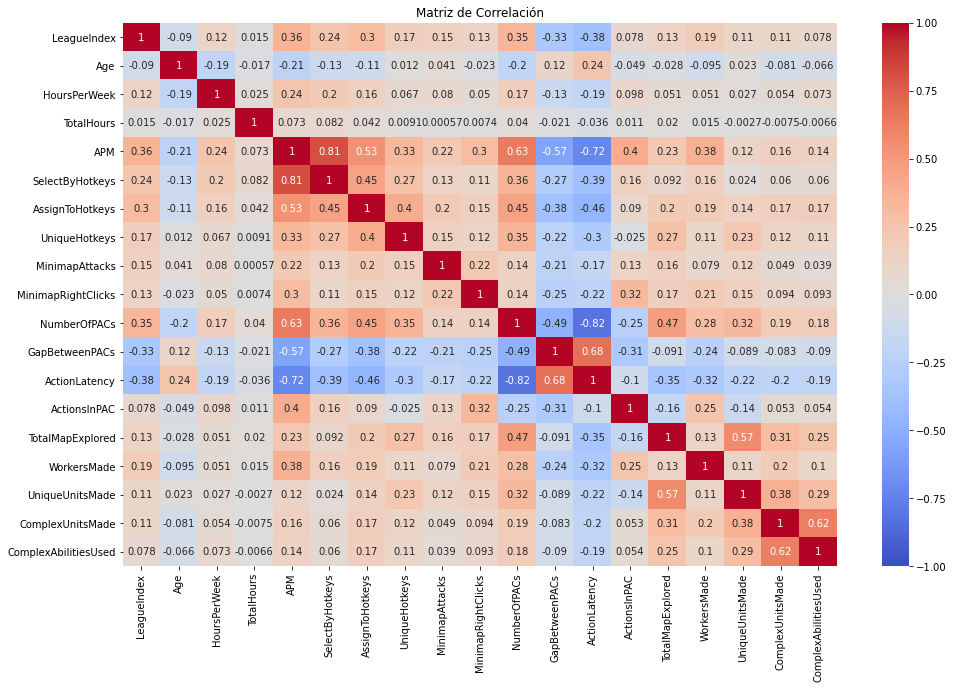

In [23]:
plt.figure(figsize=(16, 10))
corr = data.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap ="coolwarm",annot=True).set_title('Matriz de Correlación');

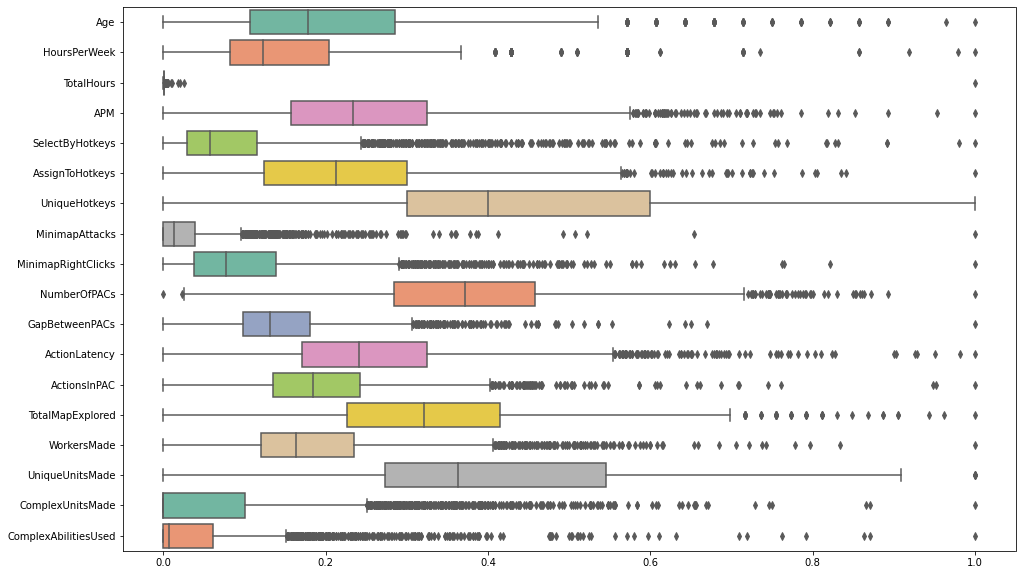

In [37]:
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)
data_norm = pd.DataFrame(data_norm, columns=data.columns)
X_norm = data_norm.drop(columns=["LeagueIndex"])

plt.figure(figsize=(16, 10))
sns.boxplot(data =X_norm, orient="h", palette="Set2");

In [38]:
data.isna().sum(axis=0)
data = data.dropna()
#data = data.drop(columns = ["ComplexUnitsMade", "MinimapAttacks"])

In [ ]:
selector = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=14).fit(X_train,y_train)
features=list(X.columns)
min_value = min(selector.get_support())
min_index = list(selector.get_support()).index(min_value) 
print("Sale: ",features[min_index])

In [39]:
y = data["LeagueIndex"]
X = data.drop(columns = ["LeagueIndex"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [57]:
clf = linear_model.Lasso(alpha=1)
clf.fit(X_train, y_train)

Lasso(alpha=1)

In [58]:
clf.coef_

array([ 0.00000000e+00,  5.54911128e-04, -1.13825181e-06,  1.11820141e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.32081178e-02, -2.91110229e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [59]:
adivinados = clf.predict(X_test)

In [60]:
print("Métricas en test")
print("MSE: %.2f" % mean_squared_error(y_test, adivinados, squared=False))
print("MAE: %.2f" % mean_absolute_error(y_test, adivinados))
print('R²: %.2f' % r2_score(y_test, adivinados))

Métricas en test
MSE: 2.99
MAE: 1.65
R²: 0.19
